In [64]:
import json

In [65]:
def load_info(path):
    with open(path,encoding='utf8') as f:
        obj = json.load(f)
    obj['stages'] = {int(key):value for key,value in obj['stages'].items()}
    return obj

In [66]:
info = load_info('replay/RB/th10_ud000c.rpy.json')

In [67]:
info.keys()

dict_keys(['ctype', 'game', 'character', 'stage', 'clear', 'stages', 'rank'])

In [68]:
info['game'],info['character'],info['ctype'],info['rank'],info['clear']

('th10', 'Reimu', 'B', 'lunatic', 'all')

In [69]:
info['stage']

6

In [70]:
print('frame score')
for i in range(info['stage']):
    stage = info['stages'][i]
    print(stage['frame'],stage['score'])

frame score
8464 2554273
10098 6970839
12246 13421823
14907 24347429
16788 38167049
20566 46866369


In [72]:
replay = info['stages'][0]['replay']
print('stage 1 frames, the length of replay is {}'.format(len(replay)))
print('replay frame 100->110',replay[100:110])
print(replay[110])
print('(start press) right left down up (pressing) ctrl right, left, down, up, shift,x,z')

stage 1 frames, the length of replay is 8464
replay frame 100->110 ['000000001000', '000000001000', '000000001000', '000000001000', '000000001000', '000000001000', '000000000001', '000100001001', '000000001001', '000000001001']
000000001001
(start press) right left down up (pressing) ctrl right, left, down, up, shift,x,z


In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

In [73]:
class press:
    @staticmethod
    def right(frame):
        return frame[0] == '1'
    @staticmethod
    def left(frame):
        return frame[1] == '1'
    @staticmethod
    def down(frame):
        return frame[2] == '1'
    @staticmethod
    def up(frame):
        return frame[3] == '1'

class pressing:
    @staticmethod
    def ctrl(frame):
        return frame[4] == '1'
    @staticmethod
    def right(frame):
        return frame[5] == '1'
    @staticmethod
    def left(frame):
        return frame[6] == '1'
    @staticmethod
    def down(frame):
        return frame[7] == '1'
    @staticmethod
    def up(frame):
        return frame[8] == '1'
    @staticmethod
    def shift(frame):
        return frame[9] == '1'
    @staticmethod
    def x(frame):
        return frame[10] == '1'
    @staticmethod
    def z(frame):
        return frame[11] == '1'
    


# Move path visualization

In [74]:
def frame_to_delta(frame):
    dx,dy = 0,0
    if pressing.right(frame):
        dx -= 1
    if pressing.left(frame):
        dx += 1
    if pressing.down(frame):
        dy -= 1
    if pressing.up(frame):
        dy += 1
    return dx,dy

def replay_to_xy(replay):
    length = len(replay)
    xy = np.zeros((length,2))
    x,y = 0.0,0.0
    for i,frame in enumerate(replay):
        dx,dy = frame_to_delta(frame)
        x,y = x+dx,y+dy
        xy[i,:] = x,y
    return xy

In [75]:
xy = replay_to_xy(replay[:300])

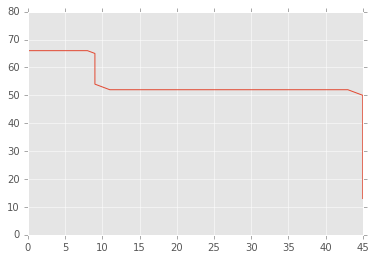

In [76]:
plt.plot(xy[:,0],xy[:,1])

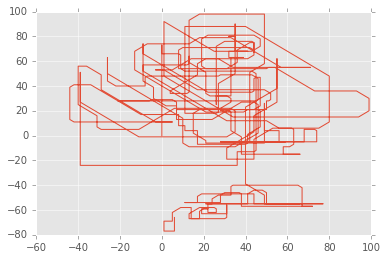

In [77]:
xy = replay_to_xy(replay)
plt.plot(xy[:,0],xy[:,1])

Note this processing does not consider the different speed of character and shift slow move

According the excellent data processing work:

http://thwiki.cc/%E6%B8%B8%E6%88%8F%E6%94%BB%E7%95%A5/STG%E6%9C%BA%E4%BD%93%E8%AF%B4%E6%98%8E

> 本作机体没有明显的强弱差距。区别在于4面道中的杂鱼分布以及4面boss的符卡会随机体不同而不同。
被弹bomb限制时间为6f(0.1s)，不建议尝试。
本作的boss运动方向具有不小的随机性，需要留意。

So 60 frame = 1s

and

>从风神录开始的系统特性统一
所有自机在miss并恢复行动力之后，无敌时间统一为3.5s（210f）（miss后总无敌时间5.1s，从版底出现到恢复行动力之前时间1.6s）。
所有魔理沙自机的移动速度统一为高速5.0、低速2.0，非魔理沙自机的移动速度统一为高速4.5、低速2.0，单位为像素/帧（px/f）。所有灵梦机体的共有特性为判定点较小。
所有自机使用bomb时，射击火力并不会降低，被弹bomb限制时间统一为8f。
所有自机对处于符卡中的boss的伤害会削弱到正常输出（对非符以及杂鱼）的1/5，这个数据在地灵殿及之后的作品中为1/7。[1]

So below we account the difference between (4.5,2.0), We are analysing Reimu alone so the (5.0,2.0) is not adopted.

In [151]:
def frame_to_delta(frame, speeds = (2.0,4.5), shock_speed = 0.0):
    dx,dy = 0,0
    speed = speeds[0] if pressing.shift(frame) else speeds[1] # pixel/frame
    
    if pressing.right(frame):
        dx += speed
    if pressing.left(frame):
        dx -= speed
    if pressing.down(frame):
        dy -= speed
    if pressing.up(frame):
        dy += speed
    
    # the vague shock movement
    if press.right(frame):
        dx += shock_speed
    if press.left(frame):
        dx -= shock_speed
    if press.down(frame):
        dy -= shock_speed
    if press.up(frame):
        dy += shock_speed

    
    return dx,dy

def replay_to_xy(replay, speeds = (2.0,4.5), shock_speed = 0.0):
    length = len(replay)
    xy = np.zeros((length,2))
    x,y = 0.0,0.0
    for i,frame in enumerate(replay):
        dx,dy = frame_to_delta(frame, speeds = speeds, shock_speed = shock_speed)
        x,y = x+dx,y+dy
        xy[i,:] = x,y
    return xy

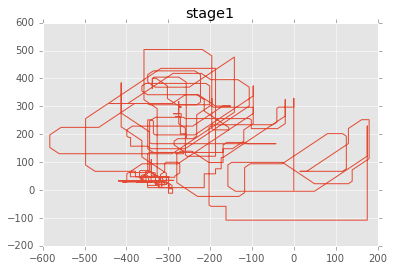

In [152]:
xy = replay_to_xy(replay, shock_speed = 0.0)
plt.title("stage1")
plt.plot(xy[:,0],xy[:,1])
plt.show()

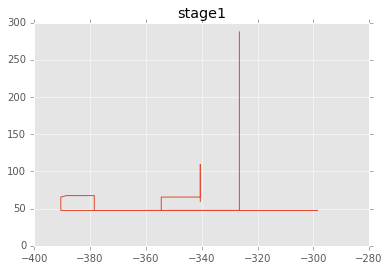

In [153]:
xy = replay_to_xy(replay)
plt.title("stage1")
plt.plot(xy[5000:6000,0],xy[5000:6000,1])
plt.show()

In [225]:
def plot_trace_2d(xy):
    #xy = replay_to_xy(replay)
    plt.plot(xy[:,0], xy[:,1])

def plot_trace_3d(xy):
    #xy = replay_to_xy(replay)
    t = np.arange(xy.shape[0])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot(xy[:,0], t, xy[:,1], label='trace')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('y')
    plt.legend()
    return ax

def plot_trace_sequence(xy, xlim, ylim, chunk = 600, desc = ''):
    length = xy.shape[0]
    idx = 0
    while idx < length:
        _xy = xy[idx:idx+chunk,:]
        plot_trace_2d(_xy)
        plt.xlim(*xlim)
        plt.ylim(*ylim)
        plt.title(desc + ' 2d trace {} - {}'.format(idx,idx+chunk))
        plt.show()
        ax = plot_trace_3d(_xy)
        ax.set_xlim(*xlim)
        ax.set_zlim(*ylim)
        plt.title(desc + ' 3d trace {} - {}'.format(idx,idx+chunk))
        plt.show()
        idx += chunk
        

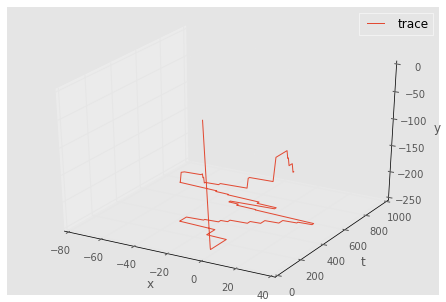

In [206]:
plot_trace_3d(replay_to_xy(replay[5000:6000]))

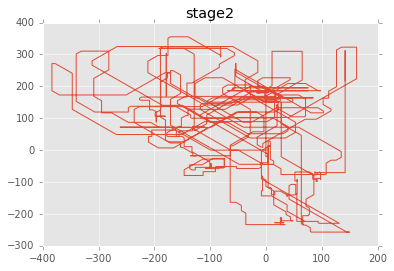

In [169]:
xy = replay_to_xy(info['stages'][1]['replay'],shock_speed =0)
plt.title("stage2")
plt.plot(xy[:,0],xy[:,1])
plt.show()

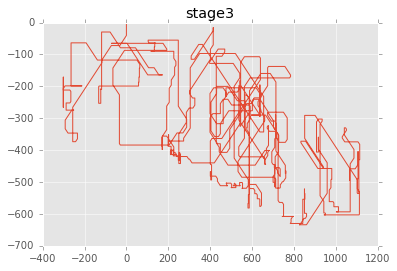

In [236]:
xy = replay_to_xy(info['stages'][2]['replay'],shock_speed=0)
plt.title("stage3")
plt.plot(xy[:,0],xy[:,1])
plt.show()

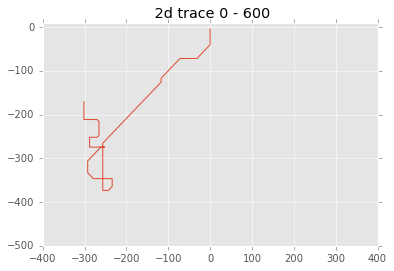

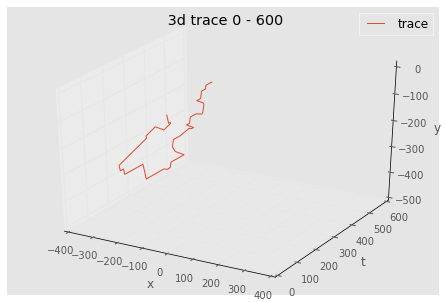

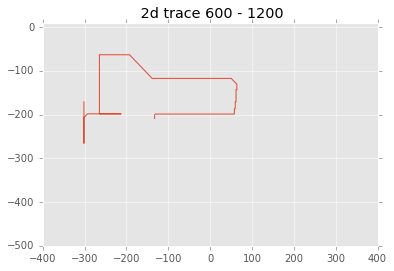

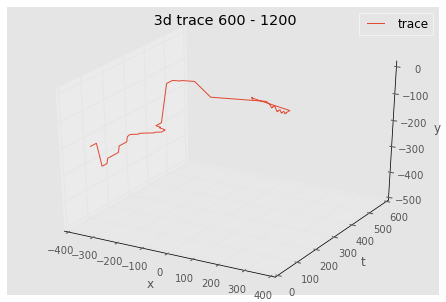

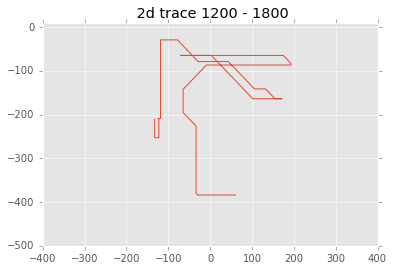

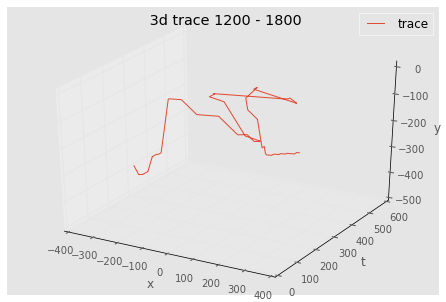

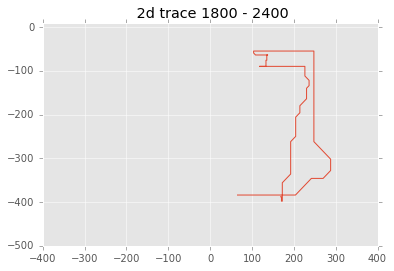

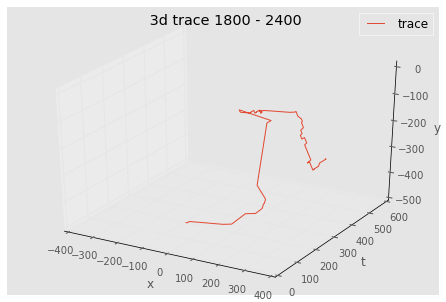

In [238]:
plot_trace_sequence(xy[:2400],xlim = (-400,400),ylim=(-500,10))

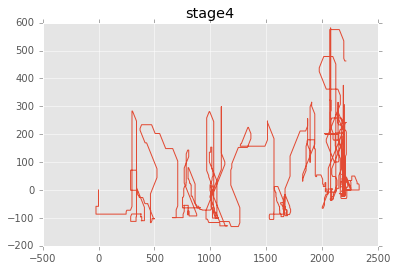

In [158]:
plot_trace_2d(replay_to_xy(info['stages'][3]['replay']))
plt.title('stage4')

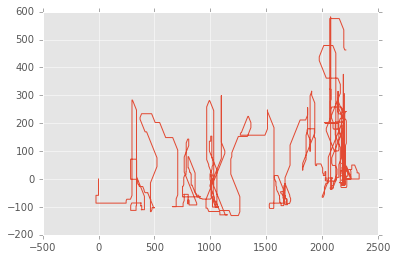

In [235]:
plot_trace_2d(replay_to_xy(info['stages'][3]['replay'],speeds=(2.0,4.5),shock_speed = 0.0))

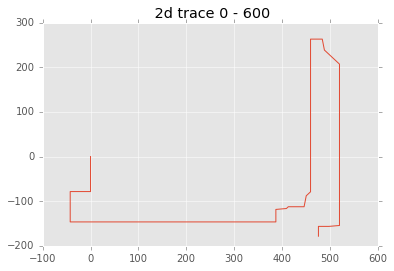

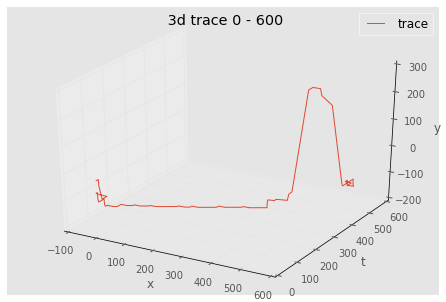

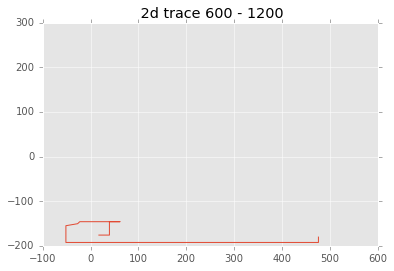

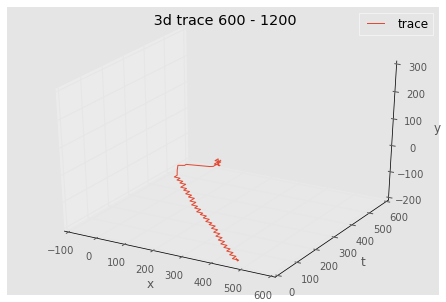

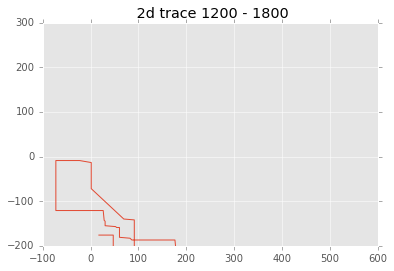

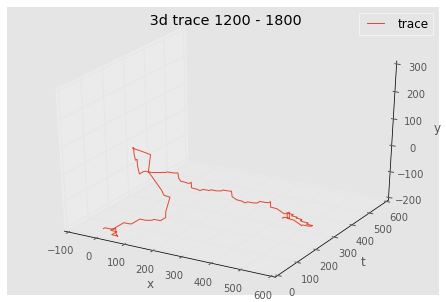

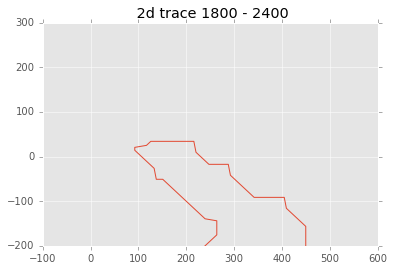

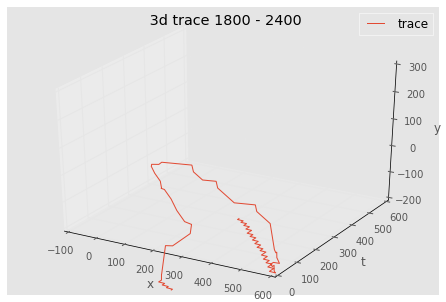

In [231]:
xy = replay_to_xy(info['stages'][3]['replay'],speeds=(2.0,4.5),shock_speed = 20.0)
plot_trace_sequence(xy[:2400],xlim = (-100,600),ylim=(-200,300))

In [202]:
xy = replay_to_xy(info['stages'][3]['replay'])

(-150, 300)

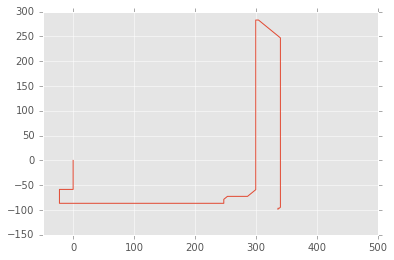

In [212]:
plot_trace_2d(xy[:600,:])
plt.xlim(-50,500)
plt.ylim(-150,300)

(-150, 300)

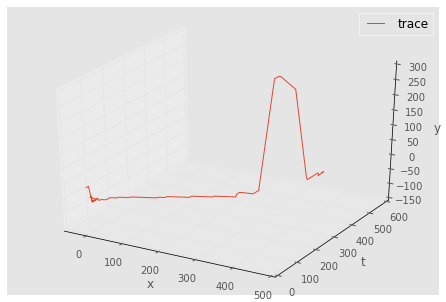

In [207]:
ax = plot_trace_3d(xy[:600,:])
ax.set_xlim(-50,500)
ax.set_zlim(-150,300)

(-150, 300)

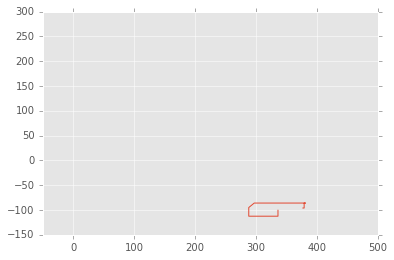

In [211]:
plot_trace_2d(xy[600:1200])
plt.xlim(-50,500)
plt.ylim(-150,300)

(-150, 300)

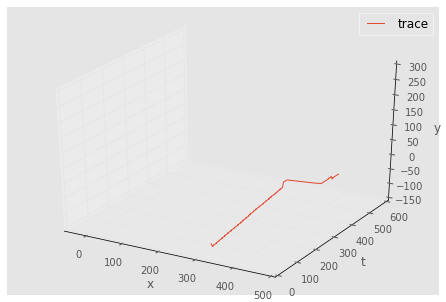

In [214]:
ax = plot_trace_3d(xy[600:1200])
ax.set_xlim(-50,500)
ax.set_zlim(-150,300)

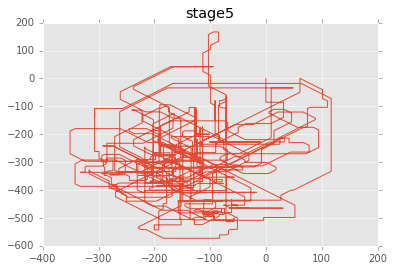

In [62]:
xy = replay_to_xy(info['stages'][4]['replay'])
plt.title("stage5")
plt.plot(xy[:,0],xy[:,1])
plt.show()

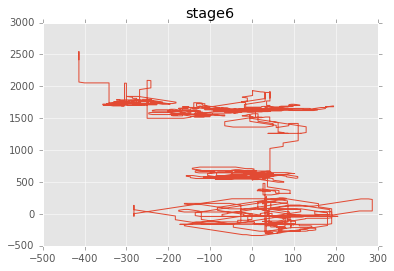

In [63]:
xy = replay_to_xy(info['stages'][5]['replay'])
plt.title("stage6")
plt.plot(xy[:,0],xy[:,1])
plt.show()

Ok... Since we can't access the time in which the character died, the path seems not vrey "normal", but we can observe some pattern in that.

## Ctrl time interval